In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
california = fetch_california_housing()

### EDA

In [111]:
california = fetch_california_housing()

In [112]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [113]:
cali = pd.DataFrame(california.data , columns=california.feature_names)
target = pd.DataFrame(california.target , columns=california.target_names)

In [114]:
data = pd.concat([cali, target], axis=1)

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


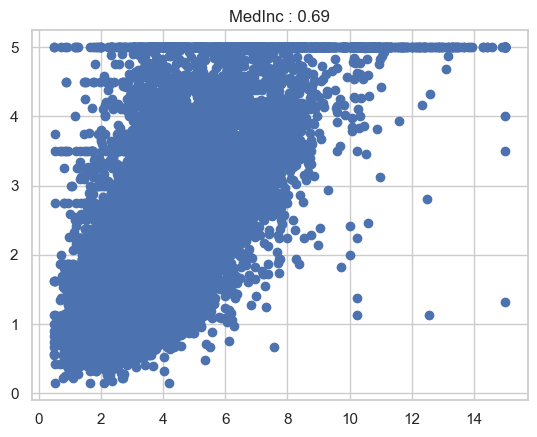

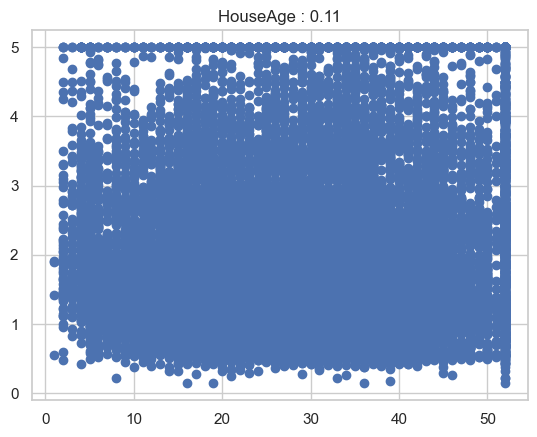

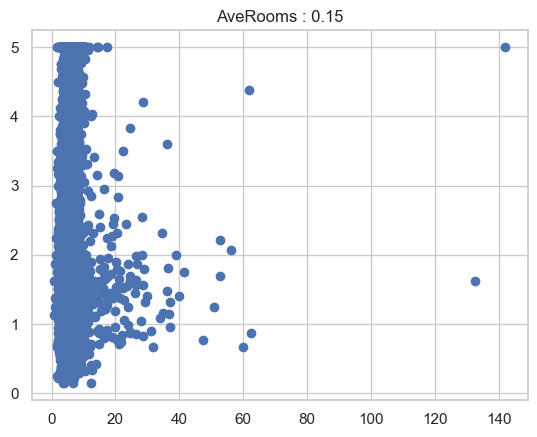

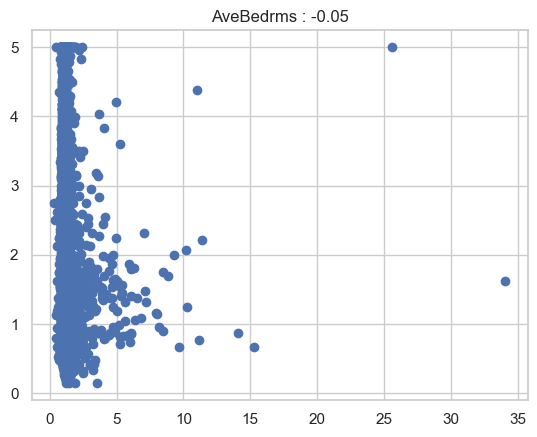

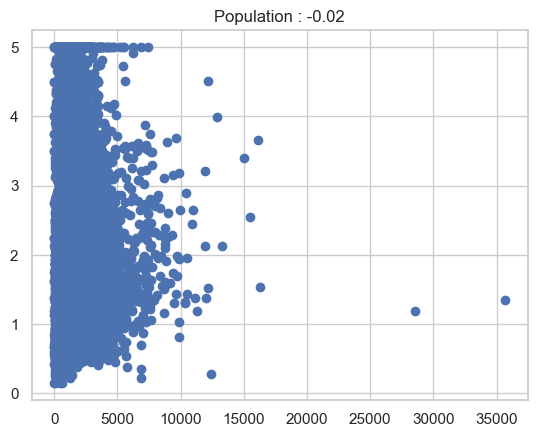

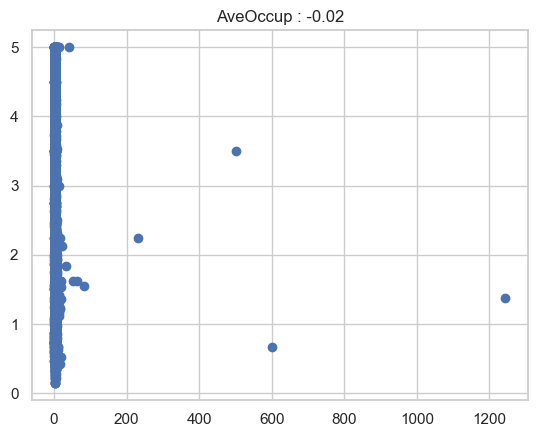

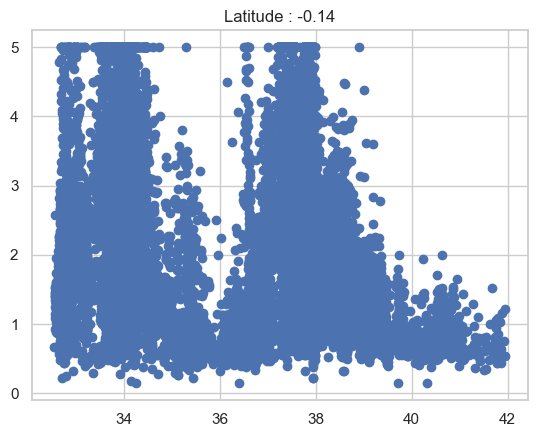

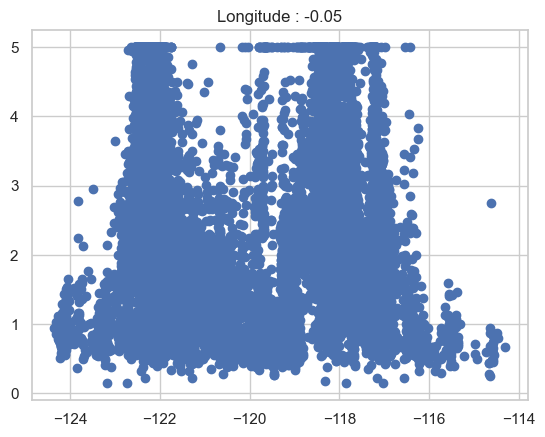

In [115]:
feature = california.feature_names

for f in feature:
    corr = np.corrcoef(data[f], data['MedHouseVal'])[0,1]
    plt.scatter(
        data[f],
        data['MedHouseVal']
    )
    plt.title(f'{f} : {corr :.2f}')
    plt.show()

In [116]:
x_train , x_test , y_train , y_test = train_test_split(cali , target , test_size= 0.2, random_state=42)

### 특정 요소들만 가지고 선형 회귀선 그려보기

- 우선 x_train 데이터를 가지고 y_predict 을 만든다
- 다음 scatter plot 을 그려서 , (x_train , y_train) vs (x_train , y_predict) 를 살펴본다. 
- scatter plot 을 그리고 MSE 가 어느정도인지 살펴본다. 

- x_test 를 가지고 , y_predict 를 만든다. 
- 다다음 scatter plot 을 그려서 , (x_test , y_test) vs (x_test , y_predict) 를 살펴본다. 
- scatter plot 을 그리고 MSE 가 어느정도인지 살펴본다.

In [117]:
x_train = x_train.iloc[:, :1]
x_test = x_test.iloc[:, :1]

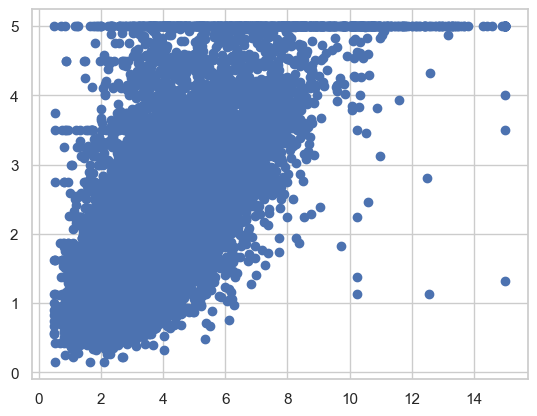

In [118]:
plt.scatter(
    x_train,
    y_train
)
plt.show()

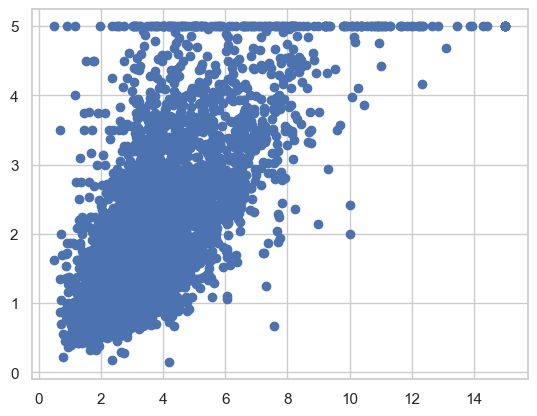

In [119]:
plt.scatter(
    x_test,
    y_test
)
plt.show()

In [120]:
model = LinearRegression()
reg = model.fit(x_train, y_train)

In [121]:
print(reg.coef_.item())
print(reg.intercept_.item())

0.41933849393812767
0.44459729169078566


In [122]:
y_pred = model.predict(x_train)
train_loss = np.mean((y_train - y_pred)**2)
print(f'train_loss:{train_loss:.4f}')

train_loss:0.6991


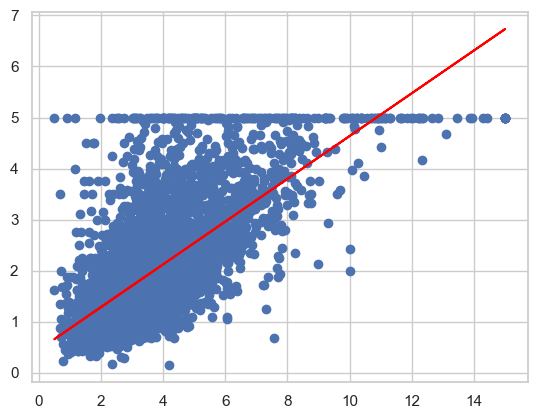

test_loss:0.7091


In [123]:
plt.scatter(x_test, y_test)

y_pred = model.predict(x_test)
plt.plot(x_test , y_pred , color = 'red')
plt.show() 

test_loss = np.mean((y_test - y_pred)**2)
print(f'test_loss:{test_loss:.4f}')

#### statsmodel로 해보기

In [124]:
!pip install statsmodels
import statsmodels.api as sm

In [125]:
x_train = sm.add_constant(x_train)

In [126]:
model = sm.OLS(y_train, x_train)
results = model.fit()

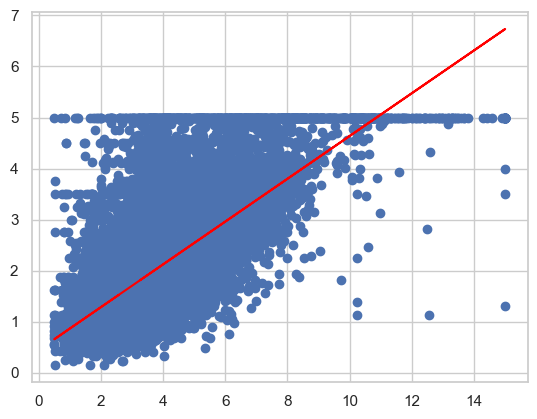

In [127]:
y_pred = results.predict(x_train)

plt.scatter(
    x_train.iloc[:, 1:],
    y_train
)

plt.plot(
    x_train.iloc[:, 1:],
    y_pred,
    color='red'
)

plt.show()

In [128]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                 1.506e+04
Date:                Fri, 28 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:01:05   Log-Likelihood:                -20475.
No. Observations:               16512   AIC:                         4.095e+04
Df Residuals:                   16510   BIC:                         4.097e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4446      0.015     30.096      0.0

In [129]:
x_test = sm.add_constant(x_test)

y_pred = results.predict(x_test)

In [130]:
x_test.iloc[:, 1:]

,MedInc
20046,1.6812
3024,2.5313
15663,3.4801
20484,5.7376
9814,3.7250
...,...
15362,4.6050
16623,2.7266
18086,9.2298
2144,2.7850


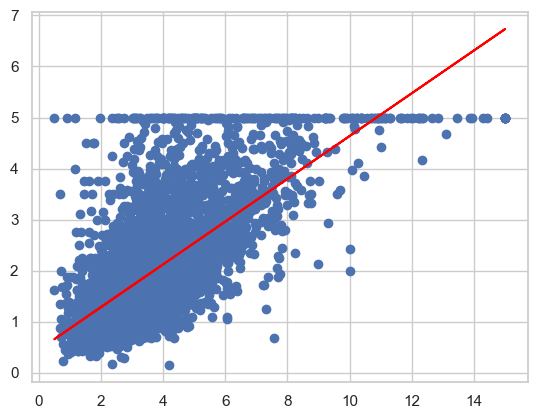

In [131]:
plt.scatter(
    x_test.iloc[:, 1:],
    y_test
)

plt.plot(
    x_test.iloc[:, 1:],
    y_pred,
    color = 'red'
)

plt.show()

### 경사하강법을 통해 구해보기

In [156]:
from sklearn.linear_model import SGDRegressor

In [135]:
x_train , x_test , y_train , y_test = train_test_split(cali , target , test_size= 0.2, random_state=42)

In [195]:
def gd_numpy(X, y, epochs, lr):
    # Model weights and bias parameters
    w = 0.0
    b = 0.0

    # Store model parameters and loss for visualization
    w_list, b_list, loss_list = [], [], []

    # Perform Gradient Descent
    for i in range(epochs):


    #################################################
    ######## Hint: use +, -, *, /, **, np.mean() ########
        loss = np.mean((y - (w*X + b))**2)   # MSE loss

        dw = -2 * np.mean((y - (w*X + b)) * X)   # derivative w.r.t to w
        db = -2 * np.mean(y - (w*X + b))   # derivative w.r.t to b
    #################################################


        w = w - lr * dw   # update w
        b = b - lr * db   # update b

        w_list.append(w)
        b_list.append(b)
        loss_list.append(loss)

    # print('Trained model weights : %.4f' % w)
    # print('Trained model bias : %.4f' % b)
    
    return w, b, w_list, b_list, loss_list

In [172]:
x_train = x_train.MedInc.values
y_train = y_train.MedHouseVal.values

In [238]:
learning_rate = [1e-15 , 1e-7 ,0.0001, 0.001, 0.01, 0.009, 0.1]
epochs=1000
loss_history = []

for l in learning_rate:
    w, b, w_list, b_list, loss_list = gd_numpy(x_train, y_train, epochs, l)
    loss_history.append(loss_list[-1])
    print(f'loss in {l}: {loss_list[-1]}')

loss in 1e-15: 5.62974232272067
loss in 1e-07: 5.5916446871449805
loss in 0.0001: 0.7221720206275313
loss in 0.001: 0.7099187104885528
loss in 0.01: 0.6991579623819654
loss in 0.009: 0.6991726369549234
loss in 0.1: nan


/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/9g/6l4kllks7p76ksrkbq5gc8tr0000gn/T/ipykernel_18753/1981635350.py:15: RuntimeWarning: overflow encountered in square
  loss = np.mean((y - (w*X + b))**2)   # MSE loss
/var/folders/9g/6l4kllks7p76ksrkbq5gc8tr0000gn/T/ipykernel_18753/1981635350.py:22: RuntimeWarning: invalid value encountered in scalar subtract
  w = w - lr * dw   # update w


In [239]:
# Training setting
epochs = 1000
learning_rate = 0.01

w, b, w_list, b_list, loss_list = gd_numpy(x_train, y_train, epochs, learning_rate)

In [247]:
# get train loss
y_pred = w * x_train + b

train_loss = np.mean((y_train - y_pred)**2)
print('Train Loss: %.4f' % train_loss)

Train Loss: 0.6992


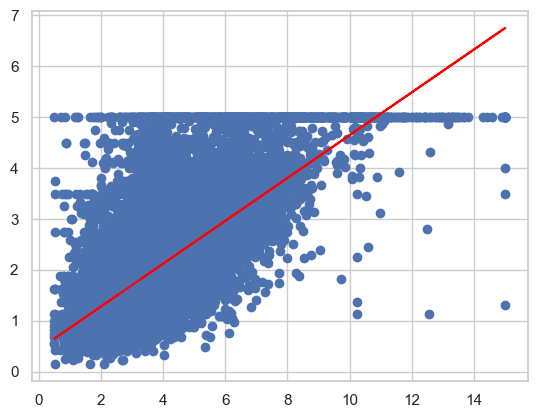

In [182]:
plt.scatter(
    x_train,
    y_train
)

plt.plot(
    x_train,
    y_pred,
    color = 'red'
)

plt.show()

In [243]:
x_test = x_test.MedInc.values

AttributeError: 'numpy.ndarray' object has no attribute 'MedInc'

In [244]:
y_test = y_test.MedHouseVal.values

In [252]:
y_pred = w*x_test + b 
test_loss = np.mean((y_pred - y_test)**2)

print(f'test_loss:{test_loss:.4f}')

test_loss:0.7092


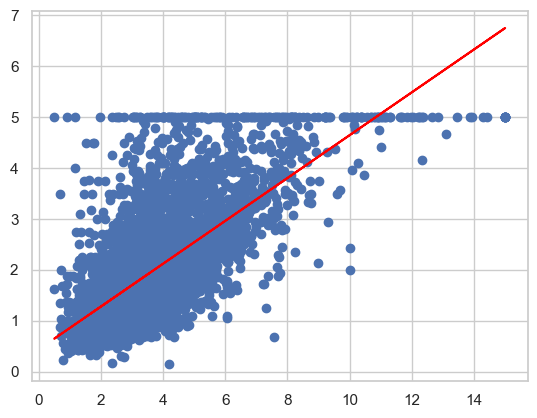

In [253]:
plt.scatter(
    x_test,
    y_test
)

plt.plot(
    x_test,
    y_pred,
    color='red'
)

plt.show()